# Practice Activity 9.2

Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn import tree

In [6]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


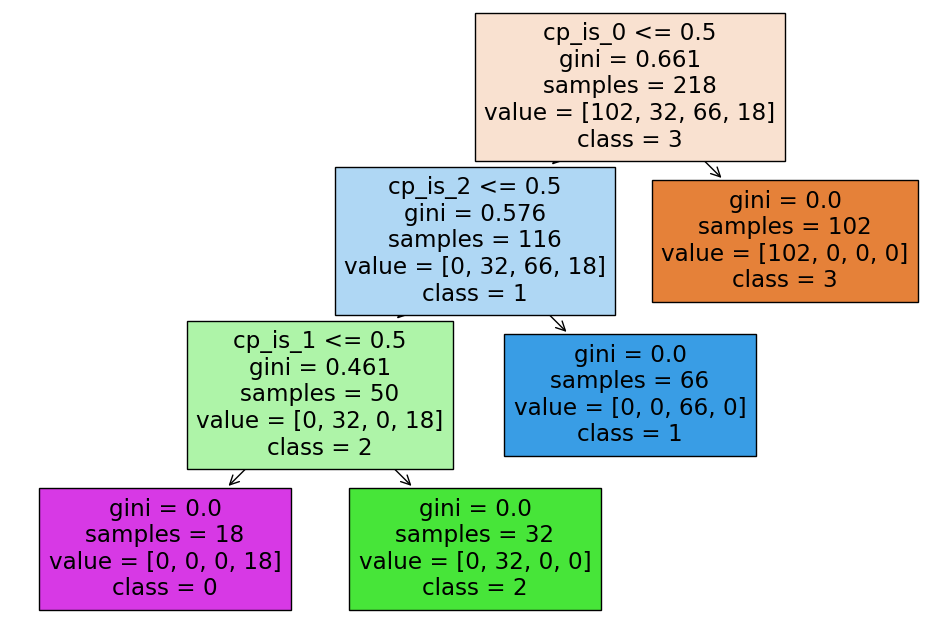

LinearDiscriminantAnalysis()

In [13]:
X = ha.drop("cp", axis=1)
y = ha["cp"]

feature_names = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Plot
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=feature_names, class_names=[str(i) for i in ha['cp'].unique()], filled=True)
plt.show()

# LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [14]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

for i in range(4):
    ha[f'cp_is_{i}'] = (ha['cp'] == i).astype(int)

f1_scores = []

for i in range(4):
    X = ha.drop(f'cp_is_{i}', axis=1)
    y = ha[f'cp_is_{i}']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    y_pred = lr_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for cp_is_{i}: {f1}")

F1 Score for cp_is_0: 1.0
F1 Score for cp_is_1: 0.9090909090909091
F1 Score for cp_is_2: 1.0
F1 Score for cp_is_3: 1.0


/Users/elleberry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/elleberry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/elleberry/ana

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [15]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score

ha_01 = ha[ha['cp'].isin([0, 1])]

roc_auc_scores = []

ovo_pairs = [(0, 1), (0, 2), (0, 3)]
for pair in ovo_pairs:
    ha_ovo = ha[ha['cp'].isin(pair)]
    
    X = ha_ovo.drop("cp", axis=1)
    y = ha_ovo["cp"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr_model_ovo = OneVsOneClassifier(LogisticRegression())
    lr_model_ovo.fit(X_train, y_train)
    
    decision_values = lr_model_ovo.decision_function(X_test)
    y_pred_proba = (decision_values - decision_values.min()) / (decision_values.max() - decision_values.min())
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(roc_auc)

for i, roc_auc in enumerate(roc_auc_scores):
    print(f"ROC-AUC for OvO pair {ovo_pairs[i]}: {roc_auc}")

ROC-AUC for OvO pair (0, 1): 1.0
ROC-AUC for OvO pair (0, 2): 1.0
ROC-AUC for OvO pair (0, 3): 1.0


/Users/elleberry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/elleberry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/elleberry/ana